*Disclaimer : I am here just trying to present the data. There is no offensive purpose at all. Maybe later on, you will find some of the data from the graph, that are considered offensive, I want to apologize. Enjoy!* 

# Data Preprocessing

First thing that we need to do, like always, import the important library that give us abilities to import the data, *pandas* and *numpy*. *Pandas* is used for manipulating a table and *numpy* is used for matrix calculation and analysis. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/income-adult/adult_data.csv
/kaggle/input/income-adult/adult_names.txt
/kaggle/input/income-adult/adult_test.csv


In [3]:
train = pd.read_csv('/kaggle/input/income-adult/adult_data.csv')
train.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


We can see from the top of the table above, there are data such as :
1.  **Age**
2.  **Workclass**
3.  **Fnlwgt** (We don't really know what this is about, so we are just going to ignore this)
4.  **Education**
5.  **Education-num** (It is actually the same as education, but in the form of numbers)
6.  **Marital-status**
7.  **Occupation**
8.  **Relationship**
9.  **Race**
10. **Sex**
11. **Capital-gain**
12. **Capital-loss**
13. **Hours-per-week**
14. **Native-country**

All of these 14 features contribute to what the salary, and that is what we will try to find out.

But first, when we see the data, especially at the name of the columns, there is something wrong there. At the beginning of each column's name, there is a space, something that is not supposed to be there. This little detail will make the analysis and the process of writing the code difficult. That is why we have to get rid of this first.  

In [4]:
column_new_names = {}
for c in train.columns[1:]:
    column_new_names[c] = c.split(' ')[1].replace('-', '_')
    
train = train.rename(columns=column_new_names)
train.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


And then after that, we also want to see how many NaN values exist in the data. After we know how many, we will determine what treatment that we will give to these data. Obviously, if the data were ***categorical-data*** we have to treat them differently than if the data were ***numerical-data***. And also how big the population of this NaN data will affect our treatment decision to the data.  

In [5]:
object_cols = [c for c in train.columns if train[c].dtype == 'O']

for c in object_cols:
    new_values = []
    for i, j in enumerate(train[c]):
        k = j.split(' ')
        if len(j) > 1: new_values.append(k[1]) 
        else: new_values.append(k[0])
    train[c] = new_values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We see from the description above, there is no NaN or null value at all. With this, we can say that we don't need to use any treatment like **imputer** or any other function to fill the NaN. We just had to go straight analyze the data.   

# Exploratory Data Analysis
## Salaries of Workers

Text(0.5, 0, 'Workers with Salary > 50k')

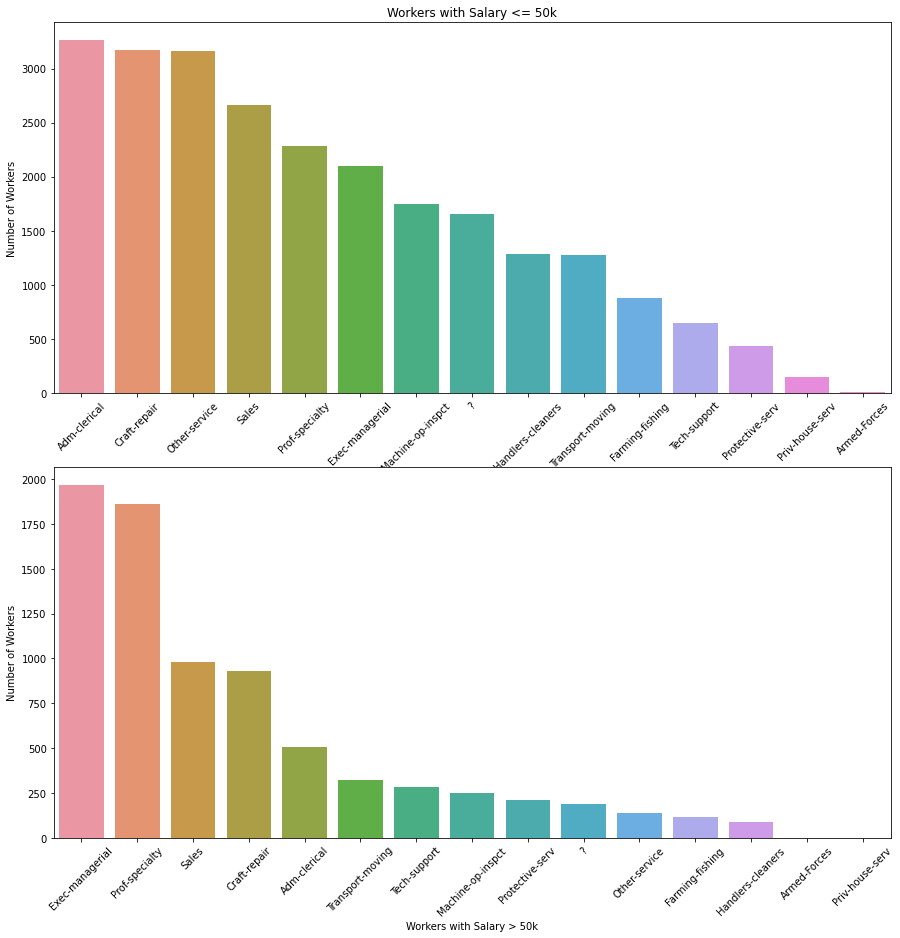

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

salary_1 = train.salary[0]
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

plot_data = train.occupation[train.salary == salary_1].value_counts().reset_index()
sns.barplot(data=plot_data, x='index', y='occupation', ax=axes[0])
axes[0].set_xticks(np.arange(len(plot_data)))
axes[0].set_xticklabels(plot_data['index'], rotation=45)
axes[0].set_ylabel('Number of Workers')
axes[0].set_title('Workers with Salary <= 50k')

plot_data = train.occupation[train.salary != salary_1].value_counts().reset_index()
sns.barplot(data=plot_data, x='index', y='occupation', ax=axes[1])
axes[1].set_xticks(np.arange(len(plot_data)))
axes[1].set_xticklabels(plot_data['index'], rotation=45)
axes[1].set_ylabel('Number of Workers')
axes[1].set_xlabel('Workers with Salary > 50k')

Above we can see the graph that showed jobs that earned less than 50 thousands and more than 50 thousands. Most of the jobs that are paid less than 50 thousands are jobs that are technical, more specifically a repairing jobs etc. There are some technicians that earned more than 50 thousands, like what the second graph showed. But They are not as many as the technicians that are paid less than that. 

The number one job with salary more than 50 thousands are **Executive Manager**. Obviously this job is the 'top of the food chain' job. If you are really good and spend long enough time on a job, at the end you will fill that position. The second one is the **Professional Speciality**. These are the people that have some specific skills simply, They are the best at what they are doing.   

## Jobs Based on Gender

Text(0.5, 0, "Female's Occupation")

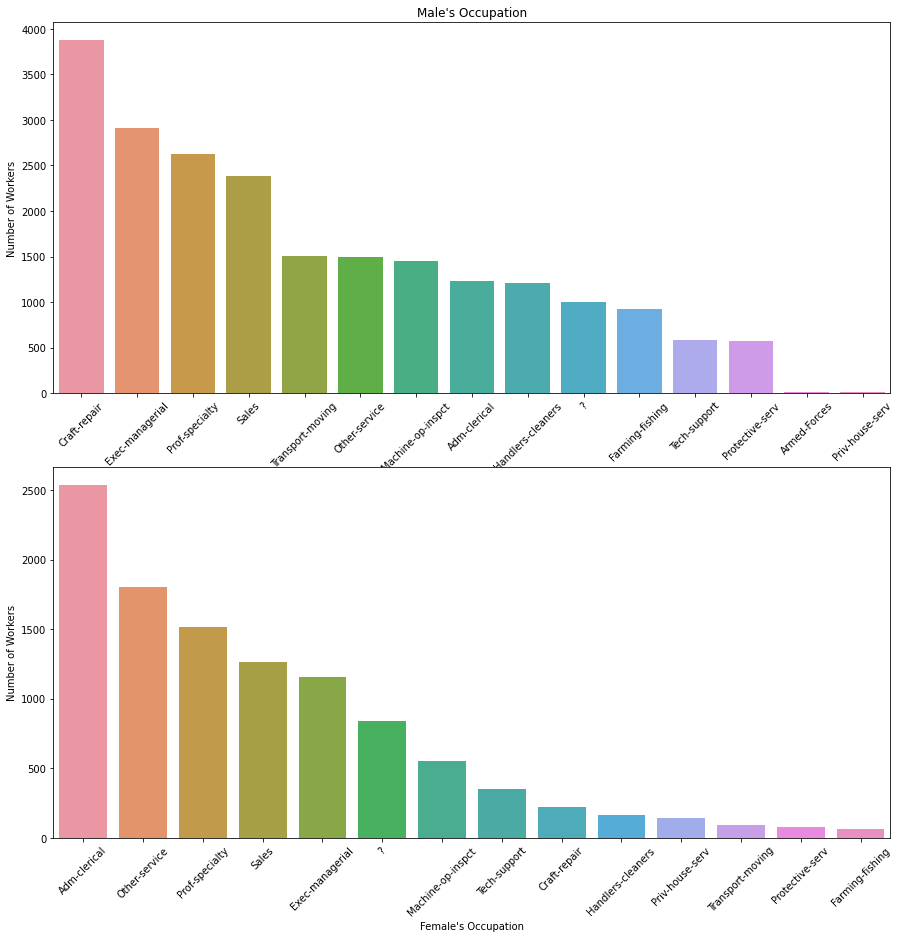

In [7]:
sex_1 = train.sex[0]
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

plot_data = train.occupation[train.sex == sex_1].value_counts().reset_index()
sns.barplot(data=plot_data, x='index', y='occupation', ax=axes[0])
axes[0].set_xticks(np.arange(len(plot_data)))
axes[0].set_xticklabels(plot_data['index'], rotation=45)
axes[0].set_ylabel('Number of Workers')
axes[0].set_title("Male's Occupation")

plot_data = train.occupation[train.sex != sex_1].value_counts().reset_index()
sns.barplot(data=plot_data, x='index', y='occupation', ax=axes[1])
axes[1].set_xticks(np.arange(len(plot_data)))
axes[1].set_xticklabels(plot_data['index'], rotation=45)
axes[1].set_ylabel('Number of Workers')
axes[1].set_xlabel("Female's Occupation")

**From the graph above, something that I can conclude is Men tended to go to more technical jobs like being a technician, Engineer or a professional and Women tended to go for Administrative jobs.**  

But the statement above doesn't really explain the whole landscape becuase jobs in the 21st centruy is more broad and unpredictible than ever before. 

## Population Based on Race

<AxesSubplot:xlabel='race', ylabel='count'>

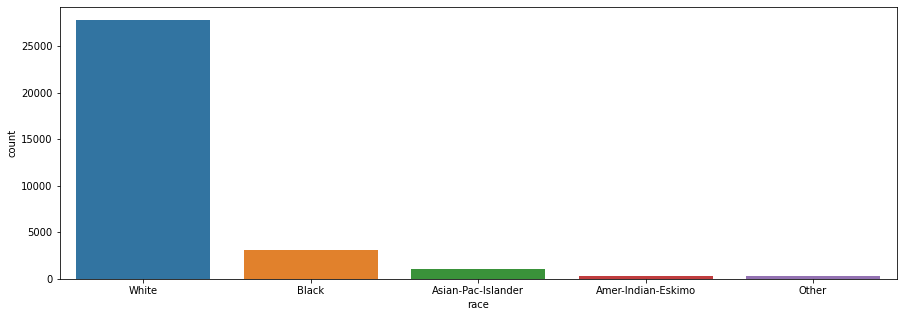

In [8]:
plt.figure(figsize=(15, 5))
sns.countplot(data=train, x='race')

It will be better to present the data on percentage rather than the actual numbers. Because we can see that the white is so dominant. If we presented the data late on using barplot like what we did above, the data that we get from other races are going to be unseen. 

In [9]:
train['>50k'] = [0 if i == '<=50K' else 1 for i in train.salary]

## Salaries Based on Races

<Figure size 1080x720 with 0 Axes>

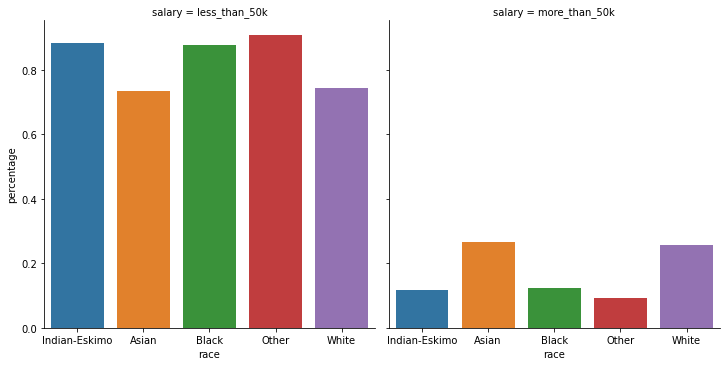

In [10]:
data_used = train[['race', '>50k']].groupby('race').mean().reset_index()
data_used['<=50k'] = 1 - data_used['>50k']
data_used = pd.melt(data_used, id_vars=['race'], value_vars=['<=50k', '>50k'])
data_used.columns = ['race', 'salary', 'percentage']
data_used = data_used.replace({'Amer-Indian-Eskimo':'Indian-Eskimo', 'Asian-Pac-Islander':'Asian',
                               '>50k':'more_than_50k', '<=50k':'less_than_50k'})

plt.figure(figsize=(15, 10))
sns.catplot(data=data_used, x='race', y='percentage', col='salary', kind='bar')

## Jobs Based on Race

<Figure size 3600x1440 with 0 Axes>

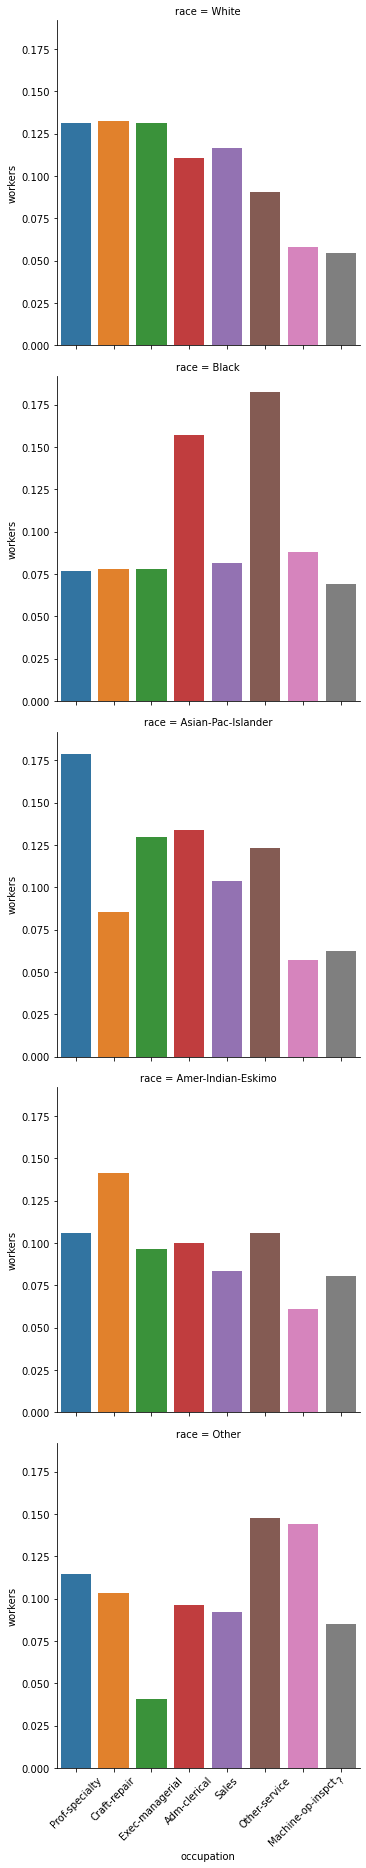

In [11]:
occupations = train.occupation.value_counts().index[:8]
race = train.race.value_counts().index
or_array = np.zeros([len(race), len(occupations)])

for i, r in enumerate(race):
    for j, o in enumerate(occupations):
        total = len(train[train.race == r])
        or_array[i, j] = len(train[(train.race == r) & (train.occupation == o)]) / total
        
or_df = pd.DataFrame(or_array, columns=occupations, index=race)
or_df = or_df.reset_index().melt(id_vars=['index']).rename(columns={'index':'race',
                                                                    'variable':'occupation',
                                                                    'value':'workers'})
plt.figure(figsize=(50, 20))
fig = sns.catplot(data=or_df, x='occupation', y='workers', row='race', kind='bar')
fig.set_xticklabels(rotation=45)

The most popular jobs for white people are : 
1. Craft repair
2. Professional
3. Executive Manager

The most popular jobs for black people are : 
1. Adm-clerical
2. Service

The most popular jobs for asian are :
1. Professional

The most popular jobs for Amer-Indian_eskimo are :
1. Craft repair

The most popular jobs for people who aren't grouped above are : 
1. Service
2. Machine Inspector

## Education Relations to Salaries

<Figure size 3600x1440 with 0 Axes>

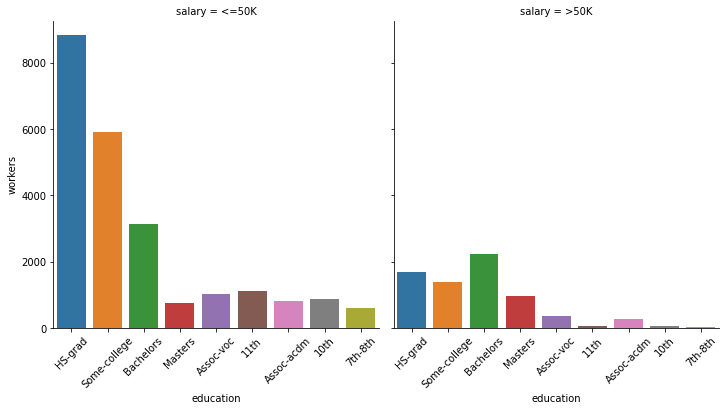

In [12]:
education = train.education.value_counts().index[:9]
salary = train.salary.value_counts().index
se_array = np.zeros([len(salary), len(education)])

for i, s in enumerate(salary):
    for j, e in enumerate(education):
        se_array[i, j] = len(train[(train.salary == s) & (train.education == e)]) 
        
se_df = pd.DataFrame(se_array, index=salary, columns=education)
se_df = se_df.reset_index().melt(id_vars='index').rename(columns={'index':'salary',
                                                                  'variable':'education',
                                                                  'value':'workers'})

plt.figure(figsize=(50, 20))
fig = sns.catplot(data=se_df, x='education', y='workers', col='salary', kind='bar')
fig.set_xticklabels(rotation=45)

We can see from the graph above, most people in this data are only a high school graduates. Most of them are getting salary less than 50 thousands dollar. After high school graduates, we have some-college graduates which most of them also had less than 50 thousands dollar as a yearly salary. 

Bachelors degree are the one who has highest numbers on the salary more than 50 thousands. But it doesn't prove that with a bachelor's degree you will get that amount of salary. Because in fact, there are more bachelor's degree workers that have salaries less than 50 thousands than more.  

## Age Relations to Salary

(0.0, 1000.0)

<Figure size 3600x1440 with 0 Axes>

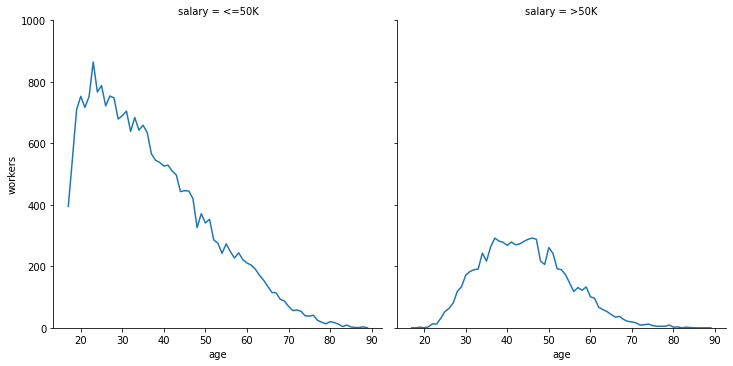

In [13]:
age = np.arange(train.age.min(), train.age.max())
salary = train.salary.value_counts().index
as_array = np.zeros([len(age), len(salary)])

for i, a in enumerate(age):
    for j, s in enumerate(salary):
        as_array[i, j] = len(train[(train.salary == s) & (train.age == a)]) 
        
as_df = pd.DataFrame(as_array, index=age, columns=salary)
as_df = as_df.reset_index().melt(id_vars='index').rename(columns={'index':'age',
                                                                  'variable':'salary',
                                                                  'value':'workers'})

plt.figure(figsize=(50, 20))
sns.relplot(data=as_df, x='age', y='workers', col='salary', kind='line')
plt.ylim(0, 1000)

You can see from the graph above, there are people who are already old but still working. They are over 60 years old and they still have jobs. These jobs have many variants, because there are elders that got paid more than 50 thousands but there are also elders that got paid less. 

But, the obvious pattern is something that you can see at the left graph. **The more you get older, the more you tend to have higher wage.** 

This makes sense because we can assume that a worker doing the same job over the years, or moved to a different new job if it offered higher wage, and the more a worker do it the higher the paid that they would receive, because people hire experinced and professional workers more.   

## Week-Hour Work Relations to Salary

(0.0, 1000.0)

<Figure size 3600x1440 with 0 Axes>

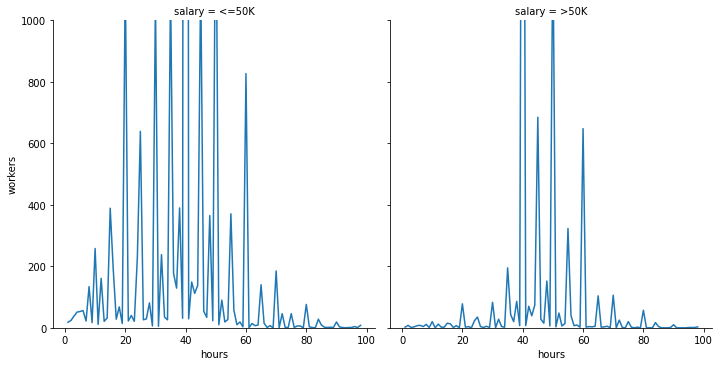

In [14]:
hours = np.arange(train.hours_per_week.min(), train.hours_per_week.max())
salary = train.salary.value_counts().index
as_array = np.zeros([len(hours), len(salary)])

for i, a in enumerate(hours):
    for j, s in enumerate(salary):
        as_array[i, j] = len(train[(train.salary == s) & (train.hours_per_week == a)]) 
        
as_df = pd.DataFrame(as_array, index=hours, columns=salary)
as_df = as_df.reset_index().melt(id_vars='index').rename(columns={'index':'hours',
                                                                  'variable':'salary',
                                                                  'value':'workers'})

plt.figure(figsize=(50, 20))
sns.relplot(data=as_df, x='hours', y='workers', col='salary', kind='line')
plt.ylim(0, 1000)

You can see at the graph above, that the left graph which showed you the distributions of workers with less than 50 thousands wage based on their work hours, it doesn't really have a pattern. Maybe there are some rules in their offices that they need to work a certain hours, but it is fair to say that workers can work more and still get paid less. 

At the other hand, the right graph which showed the workers with higher wage, it can be seen that most of these workers work between 40 to 60 hours a week. 

<AxesSubplot:xlabel='job', ylabel='workers'>

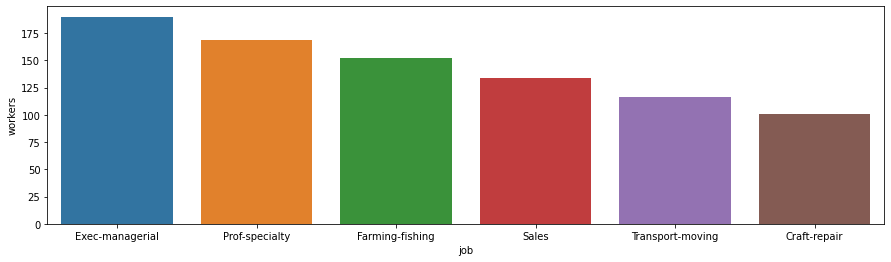

In [15]:
overworked_job = pd.DataFrame(train[train.hours_per_week > 60]['occupation'].value_counts()[:6])
oj = overworked_job.reset_index().rename(columns={'index':'job', 'occupation':'workers'})
plt.figure(figsize=(15, 4))
sns.barplot(data=oj, x='job', y='workers')

Above is the graph showing what are the jobs that spend more work-hours. We can see in the first place there is **executive managerial**, then a **professional** etc.

# Model Building

In this modeling, we will try to find the best method. There are some emthods or model that we would build and tested which are :
1. **Linear Regression** 
2. **Logistic Regression**
3. **Gaussian Naive-Bayes**
4. **K-Neighbors Classifier**
5. **Support Vector Classifier**
6. **Decision Tree Classifier**
7. **Ada Boost Classifier**
8. **Random Forest Classifier**

In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

y_values = train['>50k']
x_values = train.drop(['>50k', 'salary'], axis=1)

cat_cols = [c for c in x_values.columns if x_values[c].dtype == 'O'] 
num_cols = [c for c in x_values.columns if c not in cat_cols]

x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size=0.3)

In [17]:
workclass_le = LabelEncoder()
education_le = LabelEncoder()
marital_status_le = LabelEncoder()
occupation_le = LabelEncoder()
relationship_le = LabelEncoder()
race_le = LabelEncoder()
sex_le = LabelEncoder()
native_country_le = LabelEncoder()

cat_cols_var = [workclass_le, education_le, marital_status_le, 
                occupation_le, relationship_le, race_le, 
                sex_le, native_country_le]

cat_train_transformed = pd.DataFrame()
for i, c in zip(cat_cols, cat_cols_var):
    add = c.fit_transform(x_train[i]).reshape(-1, 1)
    add = pd.DataFrame(add, columns=[i])
    cat_train_transformed = pd.concat([cat_train_transformed, add], axis=1)
    
cat_valid_transformed = pd.DataFrame()
for i, c in zip(cat_cols, cat_cols_var):
    add = c.transform(x_valid[i]).reshape(-1, 1)
    add = pd.DataFrame(add, columns=[i])
    cat_valid_transformed = pd.concat([cat_valid_transformed, add], axis=1)
    
num_train = x_train[num_cols]
num_valid = x_valid[num_cols]
num_transformer = MinMaxScaler()

num_train_transformed = pd.DataFrame(num_transformer.fit_transform(num_train), columns=num_cols)
num_valid_transformed = pd.DataFrame(num_transformer.transform(num_valid), columns=num_cols)

x_train_transformed = pd.concat([cat_train_transformed, num_train_transformed], axis=1)
x_valid_transformed = pd.concat([cat_valid_transformed, num_valid_transformed], axis=1)

In [18]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

model = [LinearRegression(), LogisticRegression(), GaussianNB(), 
         KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), 
         AdaBoostClassifier(), RandomForestClassifier()]
model_names = ['Linear Regression', 'Logistic Regression', 'Gaussian Naive-Bayes', 
               'K-Neighbors Classifier', 'Support Vector Classifier', 'Decision Tree Classifier', 
               'Ada Boost Classifier', 'Random Forest Classifier']
scores = np.zeros(len(model)).reshape(-1, 1)

for i, m in enumerate(model):
    clf = m.fit(x_train_transformed, y_train)
    scores[i] = clf.score(x_valid_transformed, y_valid)
    
the_scores = pd.DataFrame(scores, index=model_names, columns=['score'])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
the_scores

,score
Linear Regression,0.248381
Logistic Regression,0.805712
Gaussian Naive-Bayes,0.806531
K-Neighbors Classifier,0.815641
Support Vector Classifier,0.758624
Decision Tree Classifier,0.805302
Ada Boost Classifier,0.854438
Random Forest Classifier,0.852595


In [20]:
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier()
parameters = {'n_estimators':[50, 80, 100, 130, 150, 200], 'learning_rate':[0.1, 0.5, 1, 1.2, 1.5, 2]}
clf = GridSearchCV(ab, parameters)
clf.fit(x_train_transformed, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 1.2, 1.5, 2],
                         'n_estimators': [50, 80, 100, 130, 150, 200]})

In [21]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [22]:
clf.cv_results_

{'mean_fit_time': array([0.68898344, 1.0850265 , 1.37004361, 1.76625934, 2.04781637,
        2.70578599, 0.6777936 , 1.07944036, 1.36361952, 1.74429355,
        2.01752625, 2.6943284 , 0.67434664, 1.08153715, 1.34347034,
        1.76751642, 2.0162652 , 2.70445256, 0.69015527, 1.1001092 ,
        1.3675355 , 1.77356701, 2.03162255, 2.69068274, 0.67789874,
        1.09142046, 1.3699769 , 1.77674341, 2.0143014 , 2.69524617,
        0.68777328, 1.09768391, 1.37072778, 1.78785949, 2.07374067,
        2.73708858]),
 'std_fit_time': array([0.01311582, 0.00621294, 0.0224694 , 0.00650916, 0.01298531,
        0.01490334, 0.00704814, 0.00782725, 0.02368136, 0.00685969,
        0.01423766, 0.01708826, 0.00625   , 0.00828028, 0.01004013,
        0.01699344, 0.01458677, 0.01837687, 0.00925209, 0.01006681,
        0.0173967 , 0.01289316, 0.01555546, 0.02528747, 0.0052818 ,
        0.00742784, 0.01198098, 0.03256553, 0.00974928, 0.03074214,
        0.01270684, 0.00987892, 0.00440312, 0.01743561, 0.031

In [23]:
clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 1.2, 1.5, 2],
                         'n_estimators': [50, 80, 100, 130, 150, 200]})>

In [24]:
clf = AdaBoostClassifier(n_estimators=120, learning_rate=1).fit(x_train_transformed, y_train)
s = clf.score(x_valid_transformed, y_valid)
s

0.8592486436687481

The best model that we can get here is **Ada Boost Classifier** with the parameter :
1. n_estimator = 120
2. learning_rate = 1

From this model we can get the accuracy of 86.28%.

# Conclusion
1. There are many factors contributing to how much wage a worker will get, from education to expererience
2. Jobs with the most workers to be paid more than 50 thousands dollars are **Executive Managerial** and **Professional**.
3. The best prediction model we can find is Ada Boost Classifier with the parameters: (*n_estimator* = 120, *learning_rate* = 1).